In [1]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # plotting
from glob import glob
from PIL import Image
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow.keras.backend as K
import shutil
from glob import glob
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, GlobalAveragePooling2D, Reshape, Concatenate, Flatten
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
import pickle
from difflib import SequenceMatcher  # Import SequenceMatcher for similarity comparison
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer for vectorization



This code processes images for machine learning. It imports necessary libraries and sets the paths to image data and categories. Image size is defined, and lists to store images and labels are created. 

The code goes through each category, loads the images, converts them to arrays, and stores the images and their category labels. 

These images and labels are converted to numpy arrays and normalized. Then, it splits the data into training, validation, and test sets. 

Finally, it prints the sizes of these sets to verify the distribution of data.

In [2]:


# Set paths and parameters
data_folder = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\data'
categories = ['drive','sweep','cut','legglance-flick','pull']
image_size = (224, 224)

# Initialize lists to hold images and captions
images = []
captions = []

# Walk through each category folder and load images
for category in categories:
    category_path = os.path.join(data_folder, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path, target_size=image_size)
        img = img_to_array(img)
        images.append(img)
        captions.append(category)

# Convert to numpy arrays
images = np.array(images, dtype='float32') / 255.0
captions = np.array(captions)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, captions, test_size=0.3, random_state=39)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=39)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 94
Validation set size: 20
Test set size: 21


This code imports various libraries needed for data processing and machine learning. It uses matplotlib for plotting, numpy for numerical operations, and os for directory access. pandas is for handling CSV files and data processing. 

It imports glob to find files, and PIL to handle images.

Scikit-learn tools include encoders, scalers, train-test split, and performance metrics. 

TensorFlow and Keras libraries are used to build and train neural networks, with Sequential for model construction, and layers like Dense, Conv2D, MaxPool2D, and Flatten.

It also imports optimizers and utility functions for model operations.

This code sets the path to the training directory, lists all class folders within it, and creates a dictionary mapping each class name to a numerical index. It then prints the class names and their corresponding indices.

In [3]:
import os
from glob import glob
# Path to the train directory containing class folders
train_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\data'

# Get a list of all subdirectories (class folders) in the train directory
class_names = [os.path.basename(cls) for cls in glob(os.path.join(train_dir, '*'))]

# Create a dictionary mapping class names to numerical indices
class_ind = {class_names[i]: i for i in range(len(class_names))}

print("Class names:", class_names)
print("Class indices:", class_ind)


Class names: ['cut', 'drive', 'legglance-flick', 'pull', 'sweep']
Class indices: {'cut': 0, 'drive': 1, 'legglance-flick': 2, 'pull': 3, 'sweep': 4}


This code sets the path to a dataset directory and initializes dictionaries to store image names and counts per class. It goes through each class folder, finds all images, stores their paths, and counts the number of images per class. Finally, it prints the number of images for each class.

In [4]:
# Define the path to the dataset directory containing class folders
dataset_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\data'

# Initialize dictionaries to store image names and image counts per class
image_names = {}
count_list = {}

# Iterate over each class (subdirectory) in the dataset directory
for class_name in class_names:
    # Construct the glob pattern to match all image files within the current class directory
    image_pattern = os.path.join(dataset_dir, class_name, '*')
    
    # Use glob to get a list of image file paths for the current class
    image_files = glob(image_pattern)
    
    # Store the list of image file paths in the image_names dictionary
    image_names[class_name] = image_files
    
    # Count the number of images for the current class
    num_images = len(image_files)
    
    # Store the count in the count_list dictionary
    count_list[class_name] = num_images

# Output the count_list dictionary containing the number of images per class
print("Number of images per class:")
print(count_list)


Number of images per class:
{'cut': 40, 'drive': 33, 'legglance-flick': 13, 'pull': 7, 'sweep': 42}


In [5]:
dataset = pd.DataFrame(list(count_list.items()),columns=['name','number'])
dataset

name  number
0              cut      40
1            drive      33
2  legglance-flick      13
3             pull       7
4            sweep      42

In [6]:
import random
r = lambda: random.randint(0,255)
col = lambda : ('#%02X%02X%02X' % (r(),r(),r()))

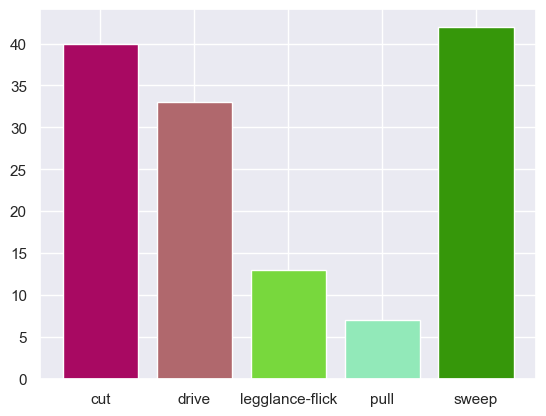

In [7]:
import seaborn as sns
sns.set(style="darkgrid")
ax = plt.bar(dataset['name'],dataset['number'] , color = [col() for i in range(6)])
plt.show()

In [8]:
sns.set_style("whitegrid", {'axes.grid' : False})

This code creates a 5x5 grid of subplots and displays images from each class. It loops through the class names, selects up to 5 images from each class, and plots them on the grid with titles showing the class names.

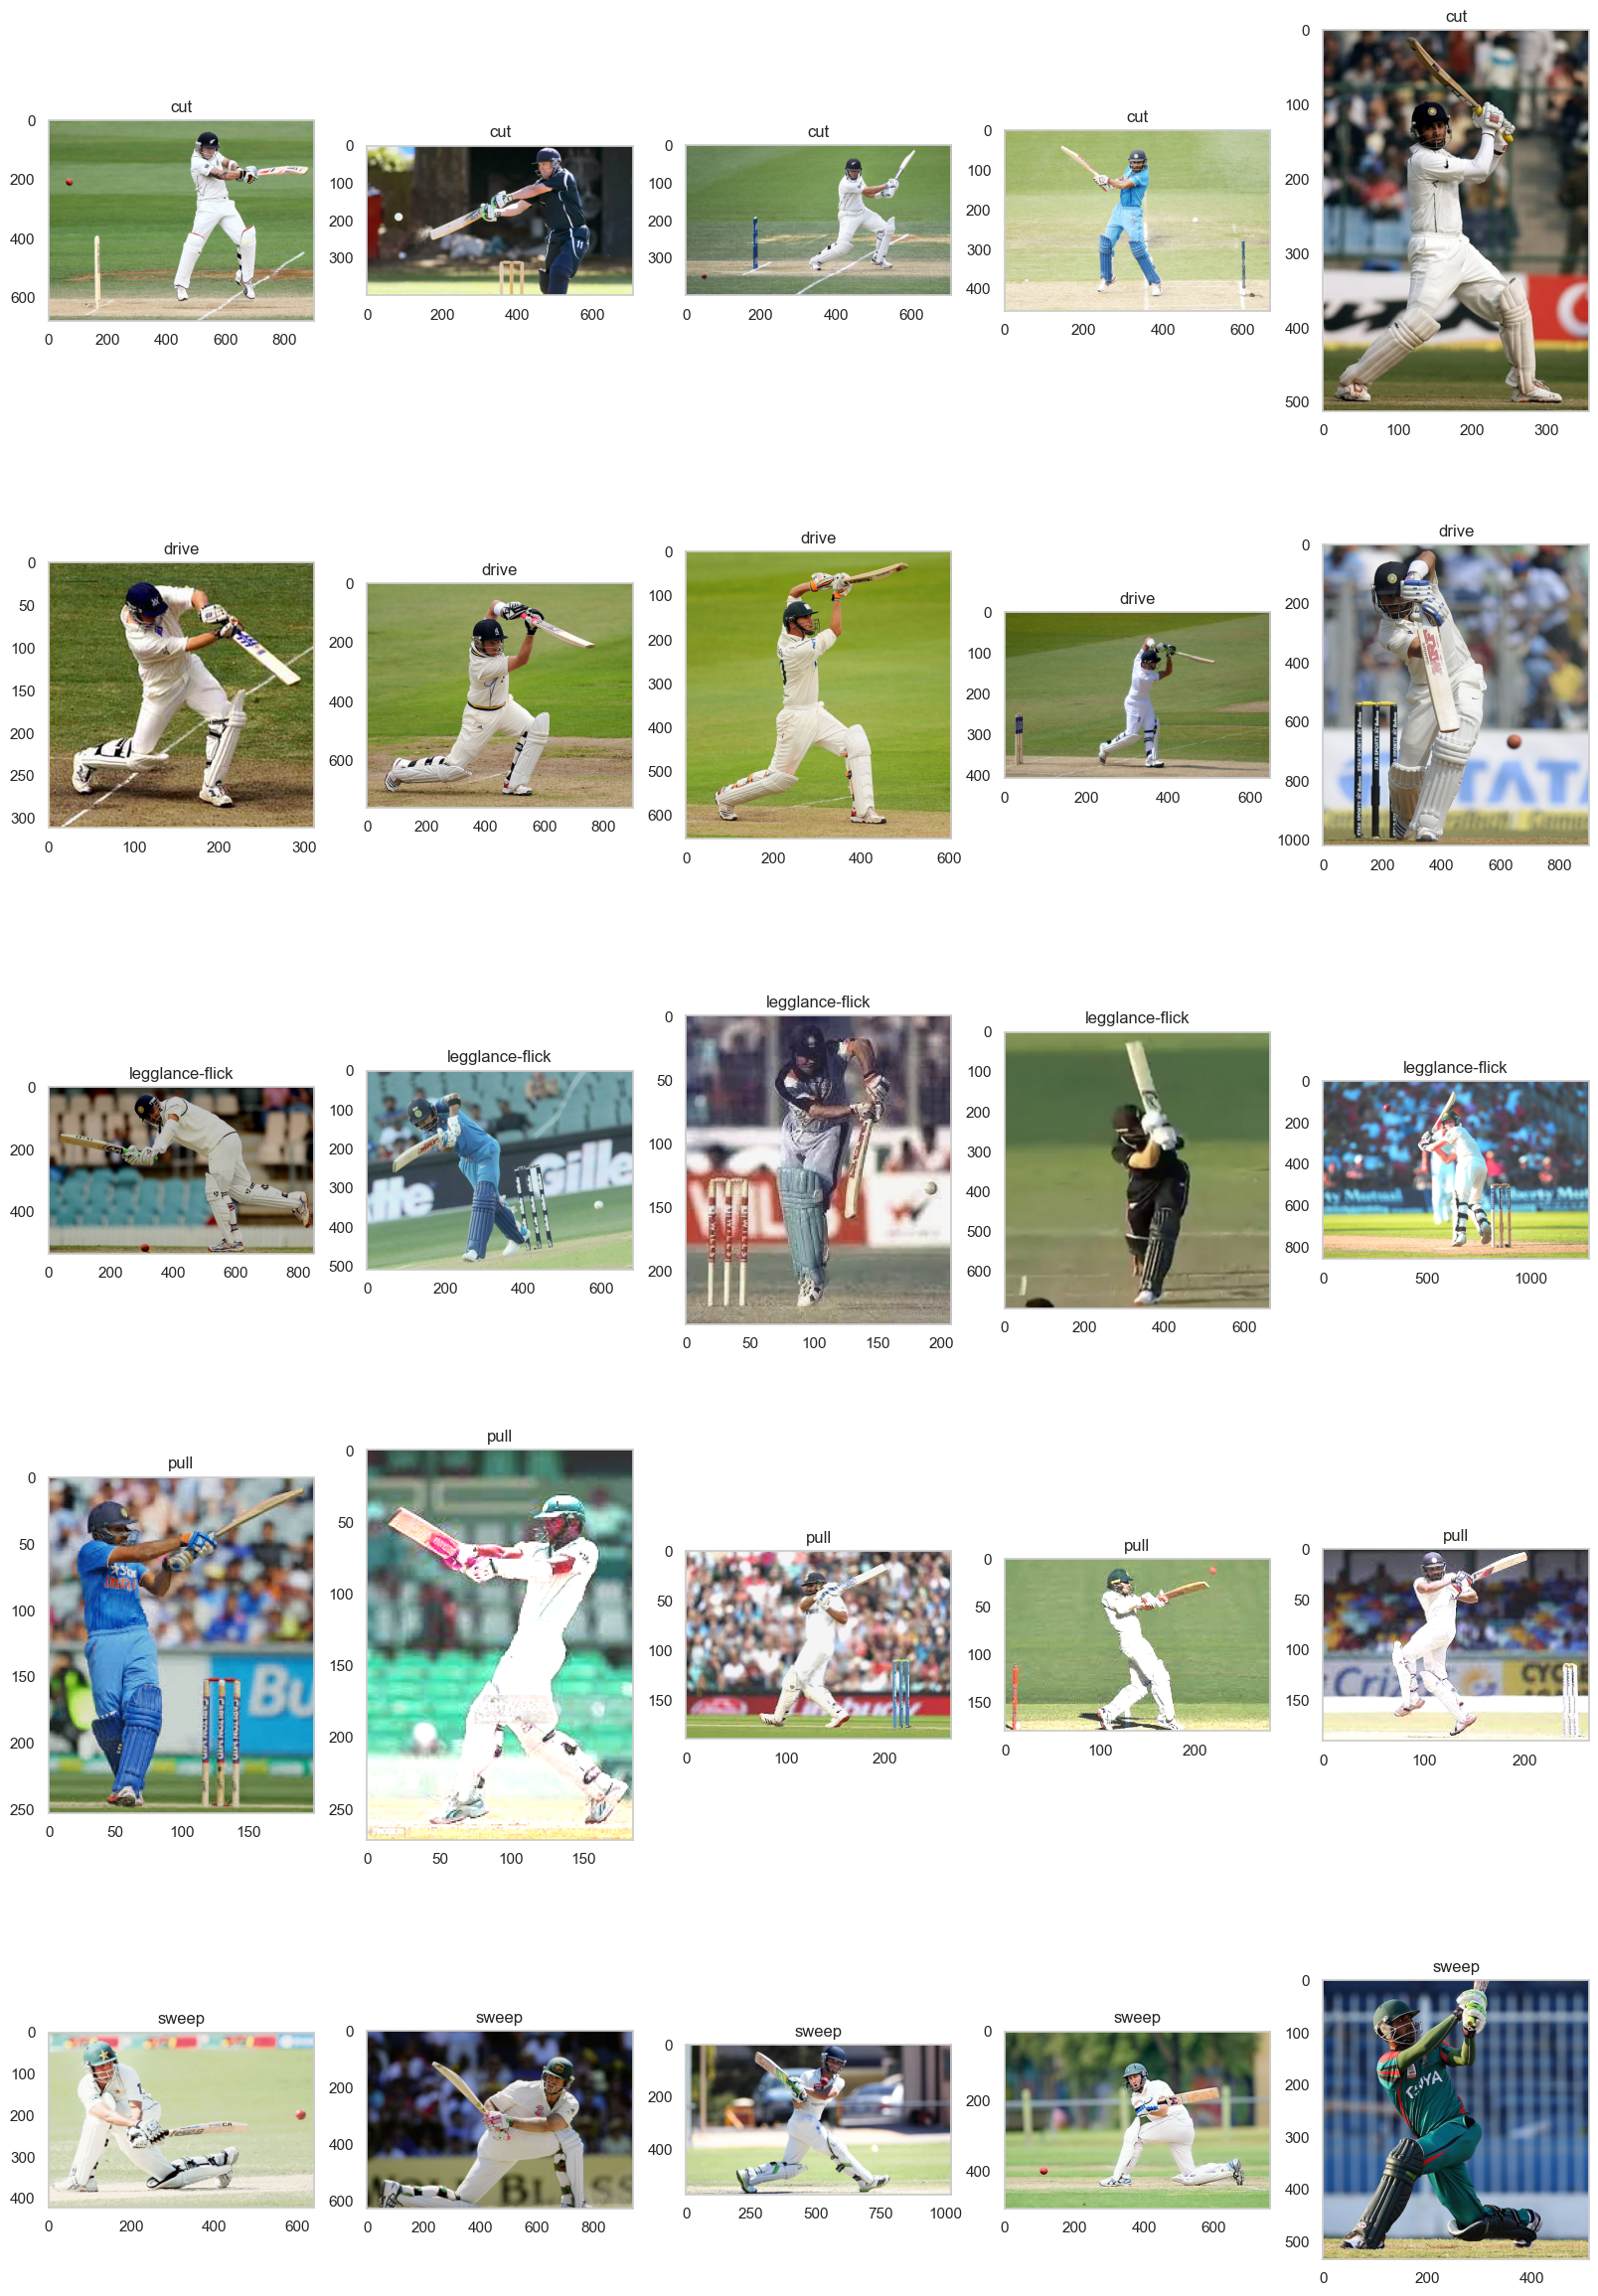

In [9]:
j = 0
fig, axs = plt.subplots(5, 5, figsize=(20,30))
for class_name in class_names:
    class_wise_names = image_names[class_name]
    i = 0
    for img_name in class_wise_names[:5]:
        img = Image.open(img_name)
        img = np.array(img)
        axs[j][i].imshow(img)
        axs[j][i].set_title(class_name)
        i+=1
    j+=1

This code resizes images from an input directory and saves them to an output directory. It sets input and output paths, creates the output directory if it doesn't exist, and defines the desired image size. For each class folder, it resizes each image to the target size using Lanczos resampling and saves the resized images to the output directory. Finally, it prints a completion message.

In [10]:


# Define input and output directories
input_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\train'
output_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\resized_train'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Desired image size
target_size = (224, 224)

# Iterate through each class directory
for class_name in os.listdir(input_dir):
    class_dir = os.path.join(input_dir, class_name)
    output_class_dir = os.path.join(output_dir, class_name)
    os.makedirs(output_class_dir, exist_ok=True)
    
    # Resize images and save to output directory
    for filename in os.listdir(class_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(class_dir, filename)
            img = Image.open(img_path)
            
            # Resize the image with the specified target size and using Lanczos resampling
            img_resized = img.resize(target_size, Image.LANCZOS)
            
            output_path = os.path.join(output_class_dir, filename)
            img_resized.save(output_path)

print("Image resizing completed.")


Image resizing completed.


In [11]:
# Define directories for training and validation data
train_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\resized_train'
output_train_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\train_split'
output_val_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\val_split'

# Create output directories for training and validation data
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_val_dir, exist_ok=True)

# Iterate through each class directory in the resized train directory
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith('.jpg')]
    
    # Split images into train and validation sets
    train_images, val_images = train_test_split(images, test_size=0.3, random_state=42)
    
    # Copy train images to output train directory
    output_train_class_dir = os.path.join(output_train_dir, class_name)
    os.makedirs(output_train_class_dir, exist_ok=True)
    for img in train_images:
        shutil.copy(img, output_train_class_dir)
    
    # Copy validation images to output validation directory
    output_val_class_dir = os.path.join(output_val_dir, class_name)
    os.makedirs(output_val_class_dir, exist_ok=True)
    for img in val_images:
        shutil.copy(img, output_val_class_dir)

print("Data splitting into train and validation sets completed.")


Data splitting into train and validation sets completed.


This code uses pre-trained VGG-16 and ResNet-50 models from TensorFlow for image classification. It imports necessary libraries and loads the models with pre-trained weights. Each model's structure is displayed with summary(). A function predict_image is defined to preprocess images, make predictions, and decode the top 3 predicted classes. The code specifies a directory with images, checks if it exists, and iterates through each image. For each image, it uses both VGG-16 and ResNet-50 models to predict and print the top 3 classes. The function uses model-specific preprocessing for accurate predictions.

In [30]:
# Load pre-trained VGG-16 model
vgg_model = VGG16(weights='imagenet', include_top=True)  # include_top=True includes the fully connected layers
vgg_model.summary()

# Load pre-trained ResNet-50 model
resnet_model = ResNet50(weights='imagenet', include_top=True)
resnet_model.summary()

# Example usage of the models for image prediction
def predict_image(model, img_path, preprocess_input_fn, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    preds = model.predict(x)
    decoded_preds = image.decode_predictions(preds, top=3)[0]  # Get top 3 predicted classes
    return decoded_preds

# Specify the directory containing images for prediction
img_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\resized_train'

# Check if the directory exists
if not os.path.exists(img_dir):
    print(f"Error: Directory '{img_dir}' not found.")
    exit(1)

# Iterate through images in the directory and predict using both models
for filename in os.listdir(img_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(img_dir, filename)
        
        # Example usage of VGG-16 model for image prediction
        decoded_preds_vgg = predict_image(vgg_model, img_path, vgg_preprocess_input)
        print(f"VGG-16 Predictions for '{filename}':", decoded_preds_vgg)
        
        # Example usage of ResNet-50 model for image prediction
        decoded_preds_resnet = predict_image(resnet_model, img_path, resnet_preprocess_input)
        print(f"ResNet-50 Predictions for '{filename}':", decoded_preds_resnet)


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

This code combines a pre-trained VGG-16 model and an LSTM model for image captioning. The VGG-16 model, pre-trained on ImageNet, extracts features from images, and its layers are frozen (not trainable). An input for images is defined, and features are extracted and reshaped. A separate LSTM model is created for processing captions. It includes an embedding layer that converts words into dense vectors and an LSTM layer for sequence processing. The LSTM's output is passed through a dense layer to predict the next word in the caption. Both models are defined with Keras functional API.

In [13]:
# Define parameters
vocab_size = 10000  # Define your vocabulary size
max_caption_length = 50  # Define the maximum length of captions
embedding_dim = 256  # Define the dimension of the embedding space

# Load pre-trained VGG-16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model.trainable = False

# Define CNN model for feature extraction
image_input = Input(shape=(224, 224, 3))
vgg_features = vgg_model(image_input)
vgg_features = GlobalAveragePooling2D()(vgg_features)  # Reduce spatial dimensions to 1x1
cnn_output = Reshape((1, 1, 512))(vgg_features)  # Reshape to match LSTM input
cnn_model = Model(inputs=image_input, outputs=cnn_output)

# Define LSTM model for captioning
caption_input = Input(shape=(max_caption_length,))
embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True)(caption_input)
lstm_output = LSTM(256)(embedding_layer)
output_layer = Dense(vocab_size, activation='softmax')(lstm_output)
caption_model = Model(inputs=caption_input, outputs=output_layer)



This code processes image data for a machine learning task. It sets the data folder path and image categories, and defines the image size. Lists for storing images and captions are initialized. The code loads images from each category folder, converts them to arrays, and appends them to the lists with their category as the caption. The images and captions are then converted to numpy arrays. The dataset is split into training, validation, and test sets. Captions are encoded using a label encoder and converted to one-hot vectors. A tokenizer is created for the captions, determining the vocabulary size.

In [14]:
# Set paths and parameters
data_folder = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\data'
categories = ['drive', 'sweep', 'cut', 'legglance-flick', 'pull']
image_size = (224, 224)

# Initialize lists to hold images and captions
images = []
captions = []

# Walk through each category folder and load images
for category in categories:
    category_path = os.path.join(data_folder, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = load_img(img_path, target_size=image_size)
        img = img_to_array(img)
        images.append(img)
        captions.append(category)  # Using category name as the caption

# Convert to numpy arrays
images = np.array(images, dtype='float32') / 255.0
captions = np.array(captions)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, captions, test_size=0.3, random_state=39)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=39)

# Encode captions
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

y_train_enc = to_categorical(y_train_enc)
y_val_enc = to_categorical(y_val_enc)
y_test_enc = to_categorical(y_test_enc)

# Tokenizer for captions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1



This code builds a model for generating captions using a combination of ResNet50 and LSTM networks. ResNet50, a pre-trained model, is used to extract image features. Its layers are frozen to prevent further training. The LSTM network is designed to generate captions based on these features and a vocabulary of words. The model architecture includes input layers for image features and caption sequences, dropout layers for regularization, and dense layers for processing. The model is compiled with the Adam optimizer and categorical cross-entropy loss. Overall, it combines image understanding from ResNet50 with language generation from LSTM for captioning tasks.

In [15]:
max_length = 1  # Since the captions are single words (categories)

# Load pre-trained ResNet50 model and extract features
resnet_model = ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Freeze the ResNet50 model
resnet_model.trainable = False

# LSTM Model for caption generation
def define_model(vocab_size, max_length):
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256)(inputs2)  # Removed input_length argument
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    decoder1 = Dense(256, activation='relu')(se3)
    decoder2 = Dense(vocab_size, activation='softmax')(decoder1)

    model = Model(inputs=[inputs1, inputs2], outputs=decoder2)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

model = define_model(vocab_size, max_length)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 256)    │      1,792 │ input_layer_7[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1, 256)    │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 256)       │    525,312 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     65,792 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 7)         │      1,799 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 594,695 (2.27 MB)

 Trainable params: 594,695 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

This code snippet prepares data and trains a model for caption generation using ResNet50 and LSTM. First, it defines a function extract_features to extract image features using ResNet50. It applies this function to training and validation images, storing the features. Next, captions are converted into sequences of numerical tokens using a tokenizer and padded to a maximum length for consistency. These sequences are then converted into one-hot encodings to match model requirements. Finally, the model is trained on the extracted image features and caption sequences for 20 epochs, using batches of 32 samples, and validates performance on validation data.

In [16]:
# Function to extract features from images using ResNet50
def extract_features(images):
    features = resnet_model.predict(images, verbose=0)
    return features

train_features = extract_features(X_train)
val_features = extract_features(X_val)

# Prepare sequences for LSTM
train_sequences = tokenizer.texts_to_sequences(y_train)
val_sequences = tokenizer.texts_to_sequences(y_val)

train_sequences = pad_sequences(train_sequences, maxlen=max_length)
val_sequences = pad_sequences(val_sequences, maxlen=max_length)

# Convert outputs to one-hot encoding
train_labels = to_categorical(train_sequences, num_classes=vocab_size)
val_labels = to_categorical(val_sequences, num_classes=vocab_size)

# Train the model
history = model.fit([train_features, train_sequences], train_labels, epochs=20, batch_size=32, validation_data=([val_features, val_sequences], val_labels))


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - loss: 1.9372 - val_loss: 1.8926
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.8745 - val_loss: 1.8202
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 1.7868 - val_loss: 1.7069
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.6496 - val_loss: 1.5356
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.4169 - val_loss: 1.2954
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.1308 - val_loss: 1.0006
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8012 - val_loss: 0.7187
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5329 - val_loss: 0.5280
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.3439 - val_loss: 0.4243
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2534 - val_loss: 0.3699
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2019 - val_loss: 0.3244
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1884 - val_loss: 0.2705


This code evaluates the trained model's performance on test images for caption generation. It extracts features from the test images using ResNet50, prepares sequences of numerical tokens from true captions using a tokenizer, and pads them to a fixed length. The model predicts captions for test images and decodes these predictions back into text using label encoding. It calculates BLEU scores, a metric for evaluating the quality of generated captions compared to true captions. Finally, it computes the average BLEU score across all test samples and prints the result to assess the model's captioning accuracy.

In [17]:
# Extract features from test images
test_features = extract_features(X_test)

# Prepare sequences for LSTM
test_sequences = tokenizer.texts_to_sequences(y_test)
test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Evaluate the model
test_labels = to_categorical(test_sequences, num_classes=vocab_size)
predictions = model.predict([test_features, test_sequences], verbose=0)

# Decode the predictions
predicted_captions = np.argmax(predictions, axis=1)

# Filter out predictions that are out of range
valid_indices = predicted_captions < len(label_encoder.classes_)
predicted_captions = predicted_captions[valid_indices]

# Decode valid predictions
predicted_captions = label_encoder.inverse_transform(predicted_captions)

# Calculate BLEU score
bleu_scores = []
for i in range(len(predicted_captions)):
    reference = [y_test[i].split()]
    candidate = [predicted_captions[i]]
    bleu = sentence_bleu(reference, candidate)
    bleu_scores.append(bleu)

average_bleu_score = np.mean(bleu_scores)
print(f'Average BLEU Score: {average_bleu_score}')


Average BLEU Score: 9.588589418133379e-233


C:\Users\sumit\anaconda4\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\sumit\anaconda4\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\sumit\anaconda4\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnin

This code snippet demonstrates a process for evaluating a model's performance in generating captions for images using deep learning techniques. 

Tokenization and Vocabulary: Captions from y_train are converted into tokens using Tokenizer, creating a vocabulary with vocab_size.

Model Definition: An LSTM-based neural network is defined to generate captions. It takes image features extracted by ResNet50 and caption tokens as inputs, predicting the next word in the sequence.

Feature Extraction: The extract_features function utilizes ResNet50 to extract high-level features from test images (X_test).

Preparing Sequences: Test captions (y_test) are tokenized and padded to a maximum length (max_length).

Model Evaluation: The model predicts captions for test images using extracted features and prepared sequences, returning softmax probabilities for word predictions.

Decoding Predictions: Predicted captions are decoded using a label encoder trained on training data to convert numeric predictions back into words.

BLEU Score Calculation: BLEU scores are calculated to measure the similarity between predicted captions and true captions (y_test). It averages scores across all predictions to evaluate captioning accuracy.

In [18]:
# Tokenizer for captions
captions = y_train.tolist()  # Assuming y_train is a list of captions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1

# Max length for captions (single word captions)
max_length = 1

# LSTM Model for caption generation
def define_model(vocab_size, max_length):
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)

    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)

    decoder1 = Dense(256, activation='relu')(se3)
    decoder2 = Dense(vocab_size, activation='softmax')(decoder1)

    model = Model(inputs=[inputs1, inputs2], outputs=decoder2)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model

model = define_model(vocab_size, max_length)

# Function to extract features from images using ResNet50
def extract_features(images):
    resnet_model = ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3))
    resnet_model.trainable = False
    features = resnet_model.predict(images, verbose=0)
    return features

# Extract features from test images
test_features = extract_features(X_test)

# Prepare sequences for LSTM
test_sequences = tokenizer.texts_to_sequences(y_test)
test_sequences = pad_sequences(test_sequences, maxlen=max_length)

# Evaluate the model
test_labels = to_categorical(test_sequences, num_classes=vocab_size)
predictions = model.predict([test_features, test_sequences], verbose=0)

# Decode the predictions
predicted_captions = np.argmax(predictions, axis=1)

# Label encoder for the captions
label_encoder = LabelEncoder()
label_encoder.fit(captions)

# Handle unseen labels gracefully
predicted_captions = np.array(predicted_captions)
predicted_captions[predicted_captions >= len(label_encoder.classes_)] = 0  # Assign a default label or handle differently

# Decode valid predictions
predicted_captions = label_encoder.inverse_transform(predicted_captions)

# Calculate BLEU score
bleu_scores = []
for i in range(len(predicted_captions)):
    reference = [y_test[i].split()]  # Reference is a list of lists of words
    candidate = [predicted_captions[i]]  # Candidate is a single word
    bleu = sentence_bleu(reference, candidate, weights=(1.0,))
    bleu_scores.append(bleu)

average_bleu_score = np.mean(bleu_scores)
print(f'Average BLEU Score: {average_bleu_score}')


Average BLEU Score: 0.23809523809523808


Low BLEU Score :

Data Quality and Quantity:

Insufficient Data: Ensure you have enough training data. Deep learning models, including LSTM and CNNs like ResNet50, require a large amount of data to perform well.
Data Augmentation: Augmenting your image data can help improve the model's performance by providing more varied training samples.


This code defines a combined model using Keras to process image and text data for a regression task. It imports necessary layers like LSTM, Embedding, Dense, and others for feature extraction and modeling. A pre-trained VGG-16 model is loaded and used for extracting image features, which are then processed with CNN layers. Textual data is processed with LSTM to generate captions. Both CNN and LSTM outputs are combined and processed through Dense layers for regression output. The model is compiled with mean squared error loss and optimized with Adam. This setup enables the model to learn and predict continuous values, suitable for regression problems.

In [19]:
# Define parameters
vocab_size = 10000  # Define your vocabulary size
max_caption_length = 50  # Define the maximum length of captions
embedding_dim = 256  # Define the dimension of the embedding space

# Load pre-trained VGG-16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model.trainable = False

# Define CNN model for feature extraction
image_input = Input(shape=(224, 224, 3))
vgg_features = vgg_model(image_input)
cnn_output = GlobalAveragePooling2D()(vgg_features)  # Reduce spatial dimensions to 1x1
cnn_output_flattened = Flatten()(cnn_output)  # Flatten the CNN output

# Define LSTM model for captioning
caption_input = Input(shape=(max_caption_length,))
embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True)(caption_input)
lstm_output = LSTM(256)(embedding_layer)

# Combine CNN and LSTM features
combined_features = Concatenate(axis=1)([cnn_output_flattened, lstm_output])
output_layer = Dense(1, activation='linear')(combined_features)

# Create the combined model
combined_model = Model(inputs=[image_input, caption_input], outputs=output_layer)
combined_model.compile(loss='mean_squared_error', optimizer='adam')
combined_model

<Functional name=functional_9, built=True>

This code snippet illustrates a comprehensive pipeline for preparing and splitting data for a machine learning task involving images and captions.

Imports and Parameter Definition: The code imports necessary libraries and defines parameters such as vocab_size for the vocabulary size of captions, max_caption_length for the maximum length of captions, image_size for resizing images, and embedding_dim for the dimension of the embedding space.

Data Loading and Preprocessing:

load_images_and_labels function: This function loads images from the specified directory (data_dir), resizes them (image_size), converts them into arrays, and collects their corresponding labels.
Label Encoding: Labels (categories) are encoded into numerical format using LabelEncoder.
Captions Tokenization:
tokenize_captions function: This function tokenizes captions, converting them into sequences of integers using Tokenizer from Keras. It also pads sequences to a fixed length (max_caption_length).
Data Splitting:

The data (images, captions, encoded_labels) are split into training, validation, and test sets using train_test_split from sklearn. Data split ratios are defined (80% train, 10% validation, 10% test).
Data Conversion:

All data arrays (X_train_images, X_val_images, X_test_images, X_train_captions, X_val_captions, X_test_captions, y_train, y_val, y_test) are converted into numpy arrays to ensure compatibility with machine learning frameworks.
Output:

The shapes of all datasets (X_train_images, X_train_captions, y_train, etc.) are printed to verify the dimensions and ensure correct data preparation.

In [20]:
import glob
# Define parameters
vocab_size = 10000  # Define your vocabulary size
max_caption_length = 50  # Define the maximum length of captions
image_size = (224, 224)  # Define the image size
embedding_dim = 256  # Define the dimension of the embedding space

# Path to the data directory
data_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\data'

# Load and preprocess images and labels
def load_images_and_labels(data_dir, image_size):
    images = []
    labels = []
    label_names = []
    for label_name in os.listdir(data_dir):
        label_folder = os.path.join(data_dir, label_name)
        if os.path.isdir(label_folder):
            for img_path in glob.glob(os.path.join(label_folder, '*.jpg')):
                img = load_img(img_path, target_size=image_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(label_name)
                label_names.append(label_name)
    return np.array(images), labels, label_names

# Tokenize captions
def tokenize_captions(captions, vocab_size, max_caption_length):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<unk>")
    tokenizer.fit_on_texts(captions)
    sequences = tokenizer.texts_to_sequences(captions)
    sequences = pad_sequences(sequences, maxlen=max_caption_length, padding='post')
    return sequences, tokenizer

# Load images and labels
images, labels, label_names = load_images_and_labels(data_dir, image_size)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
captions = [label for label in labels]

# Tokenize captions
captions, tokenizer = tokenize_captions(captions, vocab_size, max_caption_length)

# Split data into training, validation, and test sets
X_train_images, X_test_images, X_train_captions, X_test_captions, y_train, y_test = train_test_split(images, captions, encoded_labels, test_size=0.2, random_state=42)
X_train_images, X_val_images, X_train_captions, X_val_captions, y_train, y_val = train_test_split(X_train_images, X_train_captions, y_train, test_size=0.2, random_state=42)

# Ensure all datasets are numpy arrays
X_train_images = np.array(X_train_images)
X_val_images = np.array(X_val_images)
X_test_images = np.array(X_test_images)
X_train_captions = np.array(X_train_captions)
X_val_captions = np.array(X_val_captions)
X_test_captions = np.array(X_test_captions)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Data shapes:")
print("X_train_images:", X_train_images.shape)
print("X_train_captions:", X_train_captions.shape)
print("y_train:", y_train.shape)
print("X_val_images:", X_val_images.shape)
print("X_val_captions:", X_val_captions.shape)
print("y_val:", y_val.shape)
print("X_test_images:", X_test_images.shape)
print("X_test_captions:", X_test_captions.shape)
print("y_test:", y_test.shape)


Data shapes:
X_train_images: (63, 224, 224, 3)
X_train_captions: (63, 50)
y_train: (63,)
X_val_images: (16, 224, 224, 3)
X_val_captions: (16, 50)
y_val: (16,)
X_test_images: (20, 224, 224, 3)
X_test_captions: (20, 50)
y_test: (20,)


In [21]:
# Train the model
combined_model.fit([X_train_images, X_train_captions], y_train, epochs=10, batch_size=32, validation_data=([X_val_images, X_val_captions], y_val))

# Evaluate the model
loss = combined_model.evaluate([X_test_images, X_test_captions], y_test)
print("Test Loss:", loss)

# Make predictions using the combined model
combined_predictions = combined_model.predict([X_test_images, X_test_captions])

# Combine LSTM and CNN predictions (for MLP Regressor)
lstm_predictions = combined_model.predict([np.zeros_like(X_test_images), X_test_captions])
cnn_predictions = combined_model.predict([X_test_images, np.zeros_like(X_test_captions)])
all_predictions = np.concatenate((lstm_predictions, cnn_predictions), axis=1)

# Train MLP Regressor
mlp_regressor = MLPRegressor()
mlp_regressor.fit(all_predictions, y_test)

# Make predictions with the MLP Regressor
mlp_predictions = mlp_regressor.predict(all_predictions)

# Evaluate the MLP Regressor
mse = mean_squared_error(y_test, mlp_predictions)
print("Mean Squared Error:", mse)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 13s/step - loss: 89.3874 - val_loss: 62.8908
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step - loss: 36.0746 - val_loss: 33.0112
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 11s/step - loss: 22.7512 - val_loss: 29.2936
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 14s/step - loss: 22.1983 - val_loss: 34.8594
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 16s/step - loss: 26.1080 - val_loss: 37.0101
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - loss: 27.3176 - val_loss: 32.8009
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 12s/step - loss: 20.7609 - val_loss: 26.9747
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 12s/step - loss: 14.3001 - val_loss: 23.2434
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step - loss: 11.5607 - val_loss: 22.8969
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 13s/step - loss: 11.1110 - val_loss: 24.5027
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 16.6260
Test Loss: 16.625957489013672
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/

C:\Users\sumit\anaconda4\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# Define parameters
vocab_size = 10000
max_caption_length = 50
embedding_dim = 256
image_size = (224, 224)

# Path to the data directory
data_dir = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\data'

# Load and preprocess images and labels
def load_images_and_labels(data_dir, image_size):
    images = []
    labels = []
    label_names = []
    for label_name in os.listdir(data_dir):
        label_folder = os.path.join(data_dir, label_name)
        if os.path.isdir(label_folder):
            for img_path in glob.glob(os.path.join(label_folder, '*.jpg')):
                img = load_img(img_path, target_size=image_size)
                img = img_to_array(img)
                images.append(img)
                labels.append(label_name)
                label_names.append(label_name)
    return np.array(images), labels, label_names

# Tokenize captions
def tokenize_captions(captions, vocab_size, max_caption_length):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token="<unk>")
    tokenizer.fit_on_texts(captions)
    sequences = tokenizer.texts_to_sequences(captions)
    sequences = pad_sequences(sequences, maxlen=max_caption_length, padding='post')
    return sequences, tokenizer

# Load images and labels
images, labels, label_names = load_images_and_labels(data_dir, image_size)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
captions = [label for label in labels]

# Tokenize captions
captions, tokenizer = tokenize_captions(captions, vocab_size, max_caption_length)

# Split data into training, validation, and test sets
X_train_images, X_test_images, X_train_captions, X_test_captions, y_train, y_test = train_test_split(images, captions, encoded_labels, test_size=0.2, random_state=42)
X_train_images, X_val_images, X_train_captions, X_val_captions, y_train, y_val = train_test_split(X_train_images, X_train_captions, y_train, test_size=0.2, random_state=42)

# Ensure all datasets are numpy arrays
X_train_images = np.array(X_train_images)
X_val_images = np.array(X_val_images)
X_test_images = np.array(X_test_images)
X_train_captions = np.array(X_train_captions)
X_val_captions = np.array(X_val_captions)
X_test_captions = np.array(X_test_captions)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("Data shapes:")
print("X_train_images:", X_train_images.shape)
print("X_train_captions:", X_train_captions.shape)
print("y_train:", y_train.shape)
print("X_val_images:", X_val_images.shape)
print("X_val_captions:", X_val_captions.shape)
print("y_val:", y_val.shape)
print("X_test_images:", X_test_images.shape)
print("X_test_captions:", X_test_captions.shape)
print("y_test:", y_test.shape)

# Load pre-trained ResNet-50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False

# Define CNN model for feature extraction
image_input = Input(shape=(224, 224, 3))
resnet_features = resnet_model(image_input)
cnn_output = GlobalAveragePooling2D()(resnet_features)  # Reduce spatial dimensions to 1x1
cnn_output_flattened = Flatten()(cnn_output)  # Flatten the CNN output

# Define LSTM model for captioning
caption_input = Input(shape=(max_caption_length,))
embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True)(caption_input)
lstm_output = LSTM(256)(embedding_layer)

# Combine CNN and LSTM features
combined_features = Concatenate(axis=1)([cnn_output_flattened, lstm_output])
output_layer = Dense(vocab_size, activation='softmax')(combined_features)

# Create the combined model
combined_model = Model(inputs=[image_input, caption_input], outputs=output_layer)
combined_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
combined_model.fit([X_train_images, X_train_captions], y_train, epochs=10, batch_size=32, validation_data=([X_val_images, X_val_captions], y_val))

# Evaluate the model
loss, accuracy = combined_model.evaluate([X_test_images, X_test_captions], y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions using the combined model
combined_predictions = combined_model.predict([X_test_images, X_test_captions])



Data shapes:
X_train_images: (63, 224, 224, 3)
X_train_captions: (63, 50)
y_train: (63,)
X_val_images: (16, 224, 224, 3)
X_val_captions: (16, 50)
y_val: (16,)
X_test_images: (20, 224, 224, 3)
X_test_captions: (20, 50)
y_test: (20,)
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 8s/step - accuracy: 0.1481 - loss: 8.7636 - val_accuracy: 0.5625 - val_loss: 4.2725
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.3368 - loss: 4.0679 - val_accuracy: 0.5625 - val_loss: 1.2601
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.3578 - loss: 1.4460 - val_accuracy: 0.3750 - val_loss: 1.0317
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5370 - loss: 1.0416 - val_accuracy: 0.3750 - val_loss: 1.1818
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.4742 - loss: 1.0065 - val_accuracy: 0.4375 - val_loss: 1.1878
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.5995 - loss: 0.8568 - val_accuracy: 0.5000 - val_loss: 0.9956
Epoch 7/10
2/2 ━━━━━━━━━━━━━

In [23]:
# Choose a random image from the test set
random_index = np.random.randint(0, len(X_test_images))
random_image = X_test_images[random_index]


# Reshape the image to (1, 224, 224, 3) as the model expects batches
random_image = np.expand_dims(random_image, axis=0)


# Generate caption for the random image
initial_caption_token = tokenizer.texts_to_sequences(['<start>'])[0]
initial_caption_token = pad_sequences([initial_caption_token], maxlen=max_caption_length-1, padding='post')

# Replace this with your actual model prediction logic
predicted_caption = combined_model.predict([random_image, initial_caption_token])

print("Predicted Caption:", predicted_caption)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Caption: [[1.9682617e-01 6.1602724e-01 1.8714629e-01 ... 2.8606284e-11
  2.9344825e-11 2.2823195e-11]]


In [24]:
import warnings
import tensorflow as tf
from tensorflow.keras.models import save_model

# Ignore specific warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

# Reset the default graph and clear the Keras session
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

# Train the model
combined_model.fit([X_train_images, X_train_captions], y_train, epochs=10, batch_size=32, validation_data=([X_val_images, X_val_captions], y_val))




Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 5s/step - accuracy: 0.9894 - loss: 0.3223 - val_accuracy: 0.7500 - val_loss: 0.6077
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 4s/step - accuracy: 0.9684 - loss: 0.2777 - val_accuracy: 0.8125 - val_loss: 0.5451
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 1.0000 - loss: 0.2075 - val_accuracy: 0.8750 - val_loss: 0.4204
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 1.0000 - loss: 0.1508 - val_accuracy: 0.9375 - val_loss: 0.2971
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 1.0000 - loss: 0.1059 - val_accuracy: 0.9375 - val_loss: 0.2074
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 1.0000 - loss: 0.0761 - val_accuracy: 1.0000 - val_loss: 0.1534
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 4s/step - accuracy: 1.0000 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.1154
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 1.0000 - loss: 0.0385 - val_accuracy: 1.0000 - val_loss: 0.0875
Epoch 9/10
2/

In [25]:
# Save the model
combined_model.save('combined_model.keras')


In [26]:
import pickle
# Load the tokenizer used during training
tokenizer_path = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\tokenizer.pkl'  
with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)

Imports: Various libraries are imported including matplotlib.pyplot, numpy, tensorflow, and modules from Keras and sklearn for image preprocessing, model loading, and similarity comparison.

Parameters: Defines parameters such as vocab_size, max_caption_length, and image_size which are crucial for model configuration and preprocessing.

Categories: Defines a list of categories (categories) that the model classifies images into.

Load and Preprocess Image: load_and_preprocess_image function loads an image from a specified path (image_path), resizes it (image_size), converts it to an array, and preprocesses it using ResNet50's preprocessing function.

Caption Generation: generate_desc function generates a caption for the loaded image using a trained model (combined_model) and a tokenizer (tokenizer). It iteratively predicts words until an <end> token is encountered.

Load Tokenizer and Model: Loads a pre-trained tokenizer (tokenizer) and the trained model (combined_model) used for caption generation and classification.

Find Nearest Category: find_nearest_category function compares the predicted caption with predefined categories using SequenceMatcher to find the category with the highest similarity ratio.

Display Image: Loads and displays the specified image (image_path) using matplotlib.pyplot.imshow(). It also shows the predicted category as the title of the image plot.

Overall, the code showcases a complete pipeline from image loading, preprocessing, caption generation, category prediction, to visualization using matplotlib, making it ready for inference and analysis.

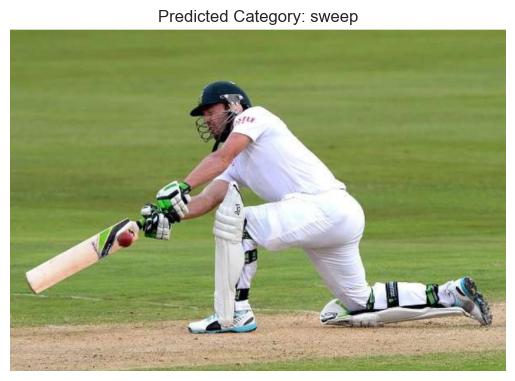

In [32]:
from tensorflow.keras.applications.resnet50 import preprocess_input
# Define parameters
vocab_size = 10000 
max_caption_length = 50
image_size = (224, 224)

# Define categories
categories = ['drive', 'sweep', 'cut', 'legglance-flick', 'pull']

# Load and preprocess the image
def load_and_preprocess_image(image_path, image_size):
    img = load_img(image_path, target_size=image_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Function to convert indices to words
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# Generate caption for the random image
def generate_desc(model, tokenizer, photo, max_length):
    in_text = '<start>'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = word_for_id(yhat, tokenizer)
        
        # Check for <end> token and break the loop
        if word == '<end>' or word is None:
            break
        
        # Append predicted word to the input sequence
        in_text += ' ' + word
        
    # Remove leading <start> token from the final caption
    final_caption = in_text.split()
    if '<start>' in final_caption:
        final_caption.remove('<start>')
    final_caption = ' '.join(final_caption)
    
    return final_caption


# Load the tokenizer
tokenizer_path = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\tokenizer.pkl'
with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)

# Load the model
model_path = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\combined_model.keras'
combined_model = tf.keras.models.load_model(model_path)

# Function to find the nearest category
def find_nearest_category(predicted_caption, categories):
    max_ratio = 0
    nearest_category = None
    for category in categories:
        ratio = SequenceMatcher(None, category, predicted_caption).ratio()
        if ratio > max_ratio:
            max_ratio = ratio
            nearest_category = category
    return nearest_category

# Load and preprocess the specific image
image_path = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\imagepath\image6.jpeg'
photo = load_and_preprocess_image(image_path, image_size)

# Generate the caption for the specific image
predicted_caption = generate_desc(combined_model, tokenizer, photo, max_caption_length)

# Classify the predicted caption
predicted_category = find_nearest_category(predicted_caption.lower(), categories)

# Display the image using matplotlib
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Category: {predicted_category}')
plt.show()

# Print the predicted caption
#print("Predicted Caption:", predicted_caption)


This script like above imports necessary libraries like matplotlib, numpy, TensorFlow, and utilities for text and image preprocessing. It defines parameters, loads images, generates captions using a trained model, and uses cosine similarity to classify the caption into predefined categories. Finally, it displays the image with the predicted category and caption using matplotlib.

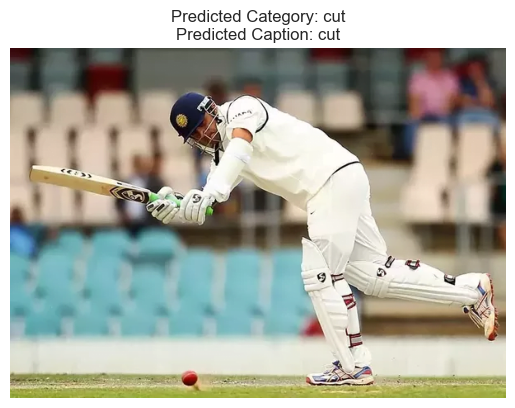

In [33]:
from tensorflow.keras.applications.resnet50 import preprocess_input
# Define parameters
vocab_size = 10000
max_caption_length = 50
image_size = (224, 224)

# Define categories
categories = ['drive', 'sweep', 'cut', 'legglance-flick', 'pull']

# Load and preprocess the image
def load_and_preprocess_image(image_path, image_size):
    img = load_img(image_path, target_size=image_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Function to convert indices to words
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# Generate caption for the random image
def generate_desc(model, tokenizer, photo, max_length):
    in_text = '<start>'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = word_for_id(yhat, tokenizer)
        
        # Check for <end> token and break the loop
        if word == '<end>' or word is None:
            break
        
        # Append predicted word to the input sequence
        in_text += ' ' + word
        
    # Remove leading <start> token from the final caption
    final_caption = in_text.split()
    if '<start>' in final_caption:
        final_caption.remove('<start>')
    final_caption = ' '.join(final_caption)
    
    return final_caption

# Load the tokenizer (ensure it's the correct one used during training)
tokenizer_path = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\tokenizer.pkl'
with open(tokenizer_path, 'rb') as f:
    tokenizer = pickle.load(f)

# Load the model (ensure it's correctly loaded)
model_path = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\combined_model.keras'
combined_model = tf.keras.models.load_model(model_path)

# Function to calculate cosine similarity
def cosine_similarity_score(text1, text2):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0, 1]

# Function to find the nearest category using cosine similarity
def find_nearest_category(predicted_caption, categories):
    max_similarity = -1
    nearest_category = None
    for category in categories:
        similarity = cosine_similarity_score(predicted_caption.lower(), category)
        if similarity > max_similarity:
            max_similarity = similarity
            nearest_category = category
    return nearest_category

# Function to preprocess and predict caption for an image
def predict_caption_and_category(image_path, model, tokenizer, max_caption_length, categories):
    # Load and preprocess the specific image
    photo = load_and_preprocess_image(image_path, image_size)

    # Generate the caption for the specific image
    predicted_caption = generate_desc(model, tokenizer, photo, max_caption_length)

    # Classify the predicted caption using cosine similarity
    predicted_category = find_nearest_category(predicted_caption, categories)

    return predicted_caption, predicted_category

# Example usage:
image_path = r'C:\Users\sumit\Desktop\ISB\Classwork\NLP_R5\imagepath\image2.jpeg'
predicted_caption, predicted_category = predict_caption_and_category(image_path, combined_model, tokenizer, max_caption_length, categories)

# Display the image using matplotlib
img = plt.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Category: {predicted_category}\nPredicted Caption: {predicted_caption}')
plt.show()
